In [ ]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing


mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [ ]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/gdrive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)       

/content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from os.path import join  

MY_GOOGLE_DRIVE_PATH = 'MyDrive/lstm' # 프로젝트 경로
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH) # 프로젝트 경로
print(PROJECT_PATH)

/content/gdrive/MyDrive/lstm


In [ ]:
%cd "{PROJECT_PATH}"

/content/gdrive/MyDrive/lstm


In [ ]:
df =  pd.read_csv('서울특별시_전세가_정보.csv', encoding='cp949', header=0)
df

,자치구명,법정동명,층,임대면적,전월세구분,보증금,계약일,건축년도,임대건물명
0,종로구,신교동,4,47.04,전세,20000,2021-01-29,1998.0,다세대/연립
1,종로구,신교동,1,31.98,전세,25000,2021-01-29,1996.0,다세대/연립
2,종로구,신교동,2,59.99,전세,35000,2021-02-22,1998.0,다세대/연립
3,종로구,신교동,4,59.31,전세,24000,2021-01-12,1997.0,다세대/연립
4,종로구,신교동,2,59.80,준전세,20480,2021-02-16,1997.0,다세대/연립
...,...,...,...,...,...,...,...,...,...
446225,관악구,봉천동,1,17.00,전세,4000,2022-01-01,2013.0,단독/다가구
446226,노원구,공릉동,14,59.94,전세,43000,2022-01-01,2001.0,아파트
446227,동작구,노량진동,1,19.38,전세,8000,2022-01-01,1990.0,단독/다가구
446228,동작구,노량진동,1,19.38,전세,8000,2022-01-01,1990.0,단독/다가구


In [ ]:
df = df.loc[df['자치구명'] == '종로구']
df

,자치구명,법정동명,층,임대면적,전월세구분,보증금,계약일,건축년도,임대건물명
0,종로구,신교동,4,47.04,전세,20000,2021-01-29,1998.0,다세대/연립
1,종로구,신교동,1,31.98,전세,25000,2021-01-29,1996.0,다세대/연립
2,종로구,신교동,2,59.99,전세,35000,2021-02-22,1998.0,다세대/연립
3,종로구,신교동,4,59.31,전세,24000,2021-01-12,1997.0,다세대/연립
4,종로구,신교동,2,59.80,준전세,20480,2021-02-16,1997.0,다세대/연립
...,...,...,...,...,...,...,...,...,...
445853,종로구,평동,4,59.76,전세,81900,2022-01-03,2017.0,아파트
445984,종로구,옥인동,1,55.00,전세,35000,2022-01-03,2021.0,단독/다가구
445999,종로구,명륜3가,1,48.50,전세,19000,2022-01-02,1994.0,단독/다가구
446079,종로구,신영동,2,79.83,전세,31500,2022-01-02,1987.0,다세대/연립


In [ ]:
df['계약일'] = pd.to_datetime(df['계약일'], format = '%Y-%m-%d')
df['연도'] = df['계약일'].dt.year
df = df.drop(['법정동명'], axis = 1)     #일단 종류가 많은 법정동명 제외
df = df.loc[df['연도']>=2021]
df = df.drop(['연도'], axis = 1)


df = df.dropna()
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,자치구명,층,임대면적,전월세구분,보증금,계약일,건축년도,임대건물명
0,종로구,4,47.04,전세,20000,2021-01-29,1998.0,다세대/연립
1,종로구,1,31.98,전세,25000,2021-01-29,1996.0,다세대/연립
2,종로구,2,59.99,전세,35000,2021-02-22,1998.0,다세대/연립
3,종로구,4,59.31,전세,24000,2021-01-12,1997.0,다세대/연립
4,종로구,2,59.80,준전세,20480,2021-02-16,1997.0,다세대/연립
...,...,...,...,...,...,...,...,...
445853,종로구,4,59.76,전세,81900,2022-01-03,2017.0,아파트
445984,종로구,1,55.00,전세,35000,2022-01-03,2021.0,단독/다가구
445999,종로구,1,48.50,전세,19000,2022-01-02,1994.0,단독/다가구
446079,종로구,2,79.83,전세,31500,2022-01-02,1987.0,다세대/연립


In [ ]:
times = df['계약일']
times

0        2021-01-29
1        2021-01-29
2        2021-02-22
3        2021-01-12
4        2021-02-16
            ...    
445853   2022-01-03
445984   2022-01-03
445999   2022-01-02
446079   2022-01-02
446163   2022-01-01
Name: 계약일, Length: 3919, dtype: datetime64[ns]

In [ ]:
df.set_index('계약일', inplace = True)

In [ ]:
df

,자치구명,층,임대면적,전월세구분,보증금,건축년도,임대건물명
계약일,,,,,,,
2021-01-29,종로구,4,47.04,전세,20000,1998.0,다세대/연립
2021-01-29,종로구,1,31.98,전세,25000,1996.0,다세대/연립
2021-02-22,종로구,2,59.99,전세,35000,1998.0,다세대/연립
2021-01-12,종로구,4,59.31,전세,24000,1997.0,다세대/연립
2021-02-16,종로구,2,59.80,준전세,20480,1997.0,다세대/연립
...,...,...,...,...,...,...,...
2022-01-03,종로구,4,59.76,전세,81900,2017.0,아파트
2022-01-03,종로구,1,55.00,전세,35000,2021.0,단독/다가구
2022-01-02,종로구,1,48.50,전세,19000,1994.0,단독/다가구


In [ ]:
values = df.values

encoder = LabelEncoder()
values[:,0] = encoder.fit_transform(values[:,0])

encoder = LabelEncoder()
values[:,3] = encoder.fit_transform(values[:,3])

encoder = LabelEncoder()
values[:,6] = encoder.fit_transform(values[:,6])

values = values.astype('float32')

scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values) #값을 0~1로 떨어뜨린다

df = pd.DataFrame(scaled, columns = ['자치구명', '층', '임대면적', '전월세구분', '보증금', '건축년도', '임대건물명'])
df

,자치구명,층,임대면적,전월세구분,보증금,건축년도,임대건물명
0,0.0,0.172414,0.141466,0.0,0.071970,0.739130,0.000000
1,0.0,0.068966,0.083948,0.0,0.090909,0.717390,0.000000
2,0.0,0.103448,0.190925,0.0,0.128788,0.739130,0.000000
3,0.0,0.172414,0.188328,0.0,0.087121,0.728260,0.000000
4,0.0,0.103448,0.190200,1.0,0.073788,0.728260,0.000000
...,...,...,...,...,...,...,...
3914,0.0,0.172414,0.190047,0.0,0.306439,0.945652,0.666667
3915,0.0,0.068966,0.171867,0.0,0.128788,0.989130,0.333333
3916,0.0,0.068966,0.147042,0.0,0.068182,0.695652,0.333333
3917,0.0,0.103448,0.266700,0.0,0.115530,0.619564,0.000000


In [ ]:
df['거래일'] = times.values
df = df.sort_values(['거래일'])

df

,자치구명,층,임대면적,전월세구분,보증금,건축년도,임대건물명,거래일
812,0.0,0.068966,0.766146,1.0,0.331818,0.934782,0.333333,2021-01-01
1835,0.0,0.068966,0.057289,0.0,0.053030,0.663042,0.333333,2021-01-01
779,0.0,0.068966,0.375664,0.0,0.128788,0.565216,0.000000,2021-01-02
2569,0.0,0.448276,0.285987,0.0,0.303030,0.967390,0.666667,2021-01-02
273,0.0,0.206897,0.311958,0.0,0.185606,0.576086,0.666667,2021-01-02
...,...,...,...,...,...,...,...,...
3120,0.0,0.275862,0.029829,0.0,0.043939,0.902174,0.666667,2022-05-05
3119,0.0,0.137931,0.070771,0.0,0.043939,0.760868,0.000000,2022-05-05
3116,0.0,0.379310,0.170721,0.0,0.099621,0.684782,0.666667,2022-05-06
3118,0.0,0.448276,0.137035,0.0,0.268939,0.945652,0.666667,2022-05-06


In [ ]:
TEST_SIZE = 200
WINDOW_SIZE = 15

train = df[:-TEST_SIZE]
test = df[-TEST_SIZE:]

In [ ]:
def make_dataset(data, label, window_size=15):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [ ]:
from sklearn.model_selection import train_test_split

feature_cols = ['자치구명', '층', '임대면적', '전월세구분',  '건축년도', '임대건물명']
label_cols = ['보증금']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 15)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((2963, 15, 6), (741, 15, 6))

In [ ]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

((200, 6), (200, 1))

In [ ]:
test_feature, test_label = make_dataset(test_feature, test_label, 15)
test_feature.shape, test_label.shape

((185, 15, 6), (185, 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )

model.add(Dense(1))

In [ ]:
import os

model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])

Epoch 1/200
186/186 [==============================] - ETA: 0s - loss: 0.0122
Epoch 1: val_loss improved from inf to 0.01138, saving model to model/tmp_checkpoint.h5
186/186 [==============================] - 3s 10ms/step - loss: 0.0122 - val_loss: 0.0114
Epoch 2/200
183/186 [============================>.] - ETA: 0s - loss: 0.0123
Epoch 2: val_loss improved from 0.01138 to 0.01124, saving model to model/tmp_checkpoint.h5
186/186 [==============================] - 2s 8ms/step - loss: 0.0123 - val_loss: 0.0112
Epoch 3/200
185/186 [============================>.] - ETA: 0s - loss: 0.0122
Epoch 3: val_loss improved from 0.01124 to 0.01115, saving model to model/tmp_checkpoint.h5
186/186 [==============================] - 2s 9ms/step - loss: 0.0122 - val_loss: 0.0112
Epoch 4/200
184/186 [============================>.] - ETA: 0s - loss: 0.0122
Epoch 4: val_loss improved from 0.01115 to 0.01115, saving model to model/tmp_checkpoint.h5
186/186 [==============================] - 2s 9ms/step -

In [ ]:
model.load_weights(filename)
pred = model.predict(test_feature)

pred.shape

(185, 1)

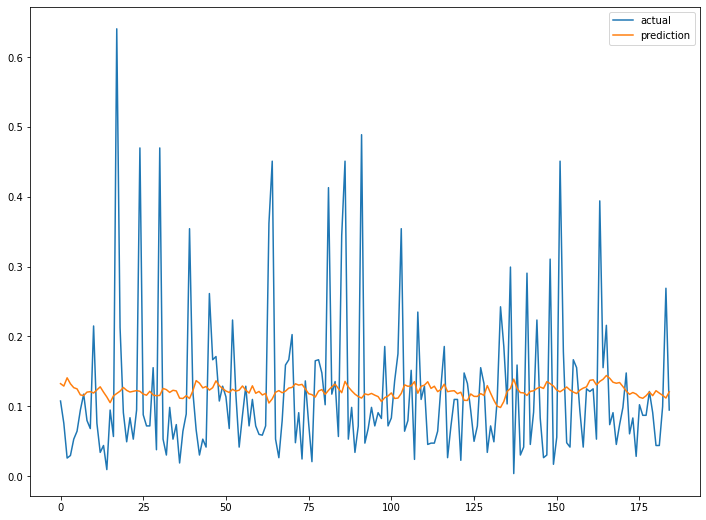

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()